1. Зниження розмірності і візуалізація даних

In [3]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

Завантаження даних, перетворення категоріальних змінних на one-hot кодування, визначення фічей та міток і масштабування даних

In [4]:
df = pd.read_csv("dataset.csv")

df = pd.get_dummies(df, drop_first=True)

X = df.drop('Heart_Attack_Yes', axis=1)
y = df['Heart_Attack_Yes']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

PCA зниження розмірності до двох та візуалізація результатів PCA

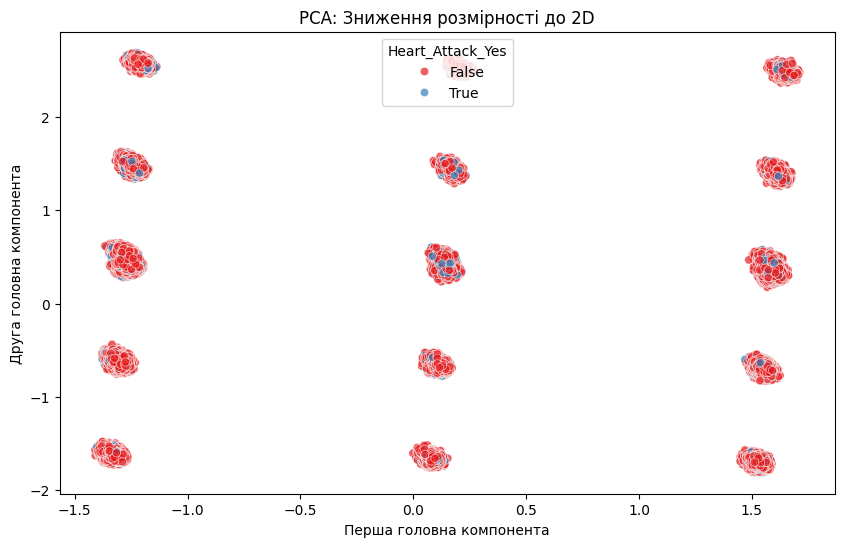

In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1', alpha=0.7)
plt.title("PCA: Зниження розмірності до 2D")
plt.xlabel("Перша головна компонента")
plt.ylabel("Друга головна компонента")
plt.show()

t-SNE зниження розмірності до двох та візуалізація результатів t-SNE

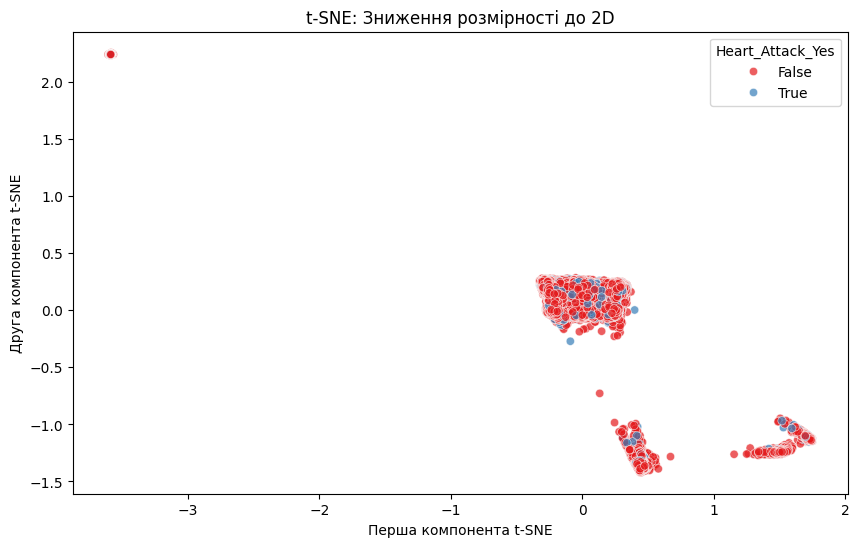

In [7]:
tsne = TSNE(n_components=2, perplexity=30, max_iter=250, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='Set1', alpha=0.7)
plt.title("t-SNE: Зниження розмірності до 2D")
plt.xlabel("Перша компонента t-SNE")
plt.ylabel("Друга компонента t-SNE")
plt.show()

2. Кластерний аналіз

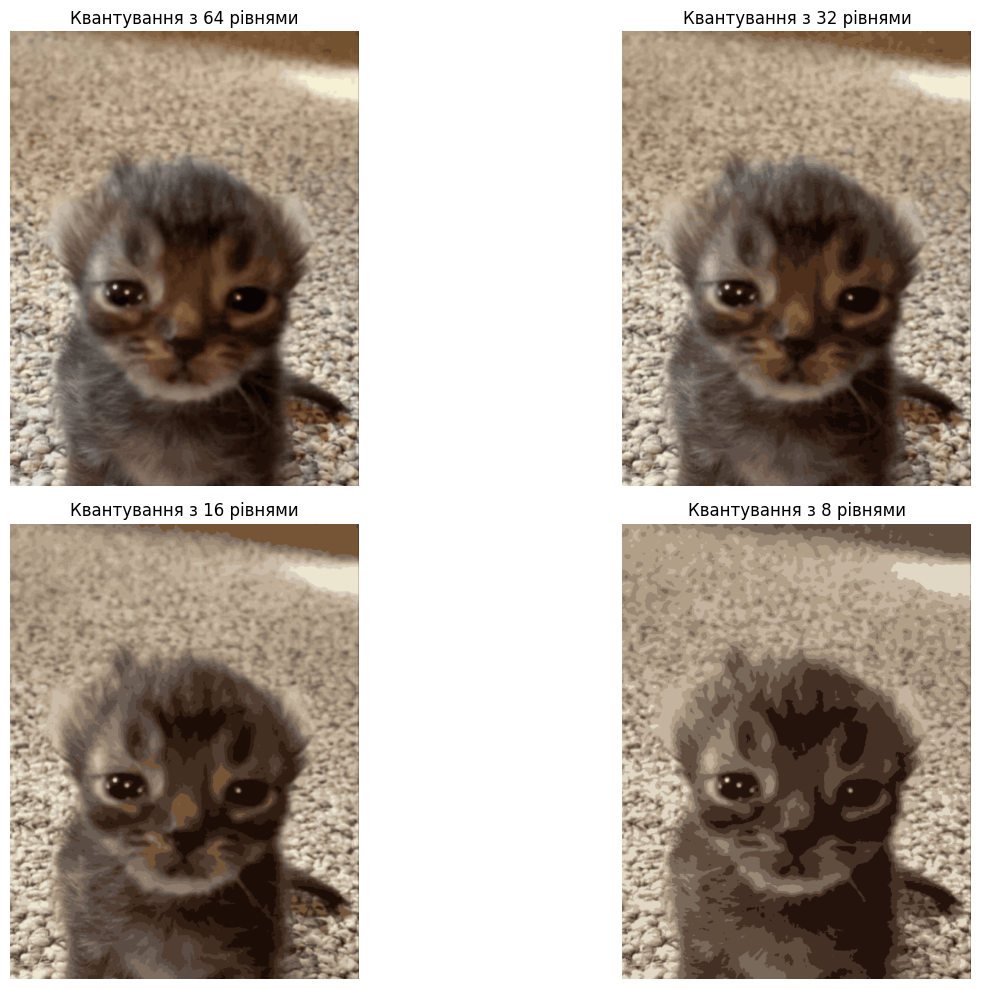

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage.io import imread
from skimage.util import img_as_float
from skimage.color import rgb2lab, lab2rgb

image = imread('img.jpeg')
image = img_as_float(image)

def quantize_image(image, n_colors):
    pixels = image.reshape(-1, 3)
    
    kmeans = KMeans(n_clusters=n_colors, random_state=42, n_init='auto')
    kmeans.fit(pixels)
    labels = kmeans.predict(pixels)
    quantized_pixels = kmeans.cluster_centers_[labels]
    
    quantized_image = quantized_pixels.reshape(image.shape)
    return quantized_image

levels = [64, 32, 16, 8]
plt.figure(figsize=(15, 10))

for i, n_colors in enumerate(levels, start=1):
    quantized_img = quantize_image(image, n_colors)
    plt.subplot(2, 2, i)
    plt.imshow(quantized_img)
    plt.title(f'Квантування з {n_colors} рівнями')
    plt.axis('off')

plt.tight_layout()
plt.show()

3. Обробка та класифікація текстових даних
Датасет: https://www.reddit.com/r/datasets/comments/1uyd0t/200000_jeopardy_questions_in_a_json_file/?rdt=39339

Завантажено дані з CSV-файлу.
Проведена передобробка тексту:
Видалено пунктуацію та стоп-слова.
Тексти приведено до нижнього регістру.
Створено нову категоріальну ознаку для стовпця Value (розподіл на класи: low, medium, high).
Векторизація текстів здійснена за допомогою TfidfVectorizer.

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.metrics import classification_report
import string
import nltk

df = pd.read_csv('wordset.csv')

df.columns = df.columns.str.strip()

print("Наявні стовпці у датасеті:")
print(df.columns)

print("\nПерші 5 рядків датасету:")
print(df.head())

def value_category(value):
    if isinstance(value, str):
        value = value.replace('$', '').replace(',', '')
        try:
            value = float(value)
        except ValueError:
            return 'low'
    if value <= 400:
        return 'low'
    elif value <= 800:
        return 'medium'
    else:
        return 'high'

df['value_category'] = df['Value'].apply(value_category)

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

df['cleaned_question'] = df['Question'].apply(preprocess_text)

X = df['cleaned_question']
y = df['value_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(f"Приклад векторизованого тексту:\n{X_train_tfidf[0].toarray()}")

from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)


Наявні стовпці у датасеті:
Index(['Show Number', 'Air Date', 'Round', 'Category', 'Value', 'Question',
       'Answer'],
      dtype='object')

Перші 5 рядків датасету:
   Show Number    Air Date      Round                         Category Value  \
0         4680  2004-12-31  Jeopardy!                          HISTORY  $200   
1         4680  2004-12-31  Jeopardy!  ESPN's TOP 10 ALL-TIME ATHLETES  $200   
2         4680  2004-12-31  Jeopardy!      EVERYBODY TALKS ABOUT IT...  $200   
3         4680  2004-12-31  Jeopardy!                 THE COMPANY LINE  $200   
4         4680  2004-12-31  Jeopardy!              EPITAPHS & TRIBUTES  $200   

                                            Question      Answer  
0  For the last 8 years of his life, Galileo was ...  Copernicus  
1  No. 2: 1912 Olympian; football star at Carlisl...  Jim Thorpe  
2  The city of Yuma in this state has a record av...     Arizona  
3  In 1963, live on "The Art Linkletter Show", th...  McDonald's  
4  Signer of th

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\XXX\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Приклад векторизованого тексту:
[[0. 0. 0. ... 0. 0. 0.]]


MultinomialNB()

Візуалізація найбільш поширених слів за допомогою wordcloud

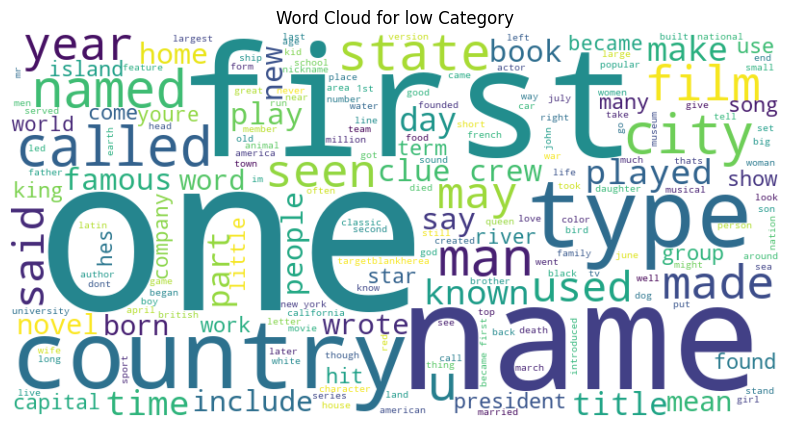

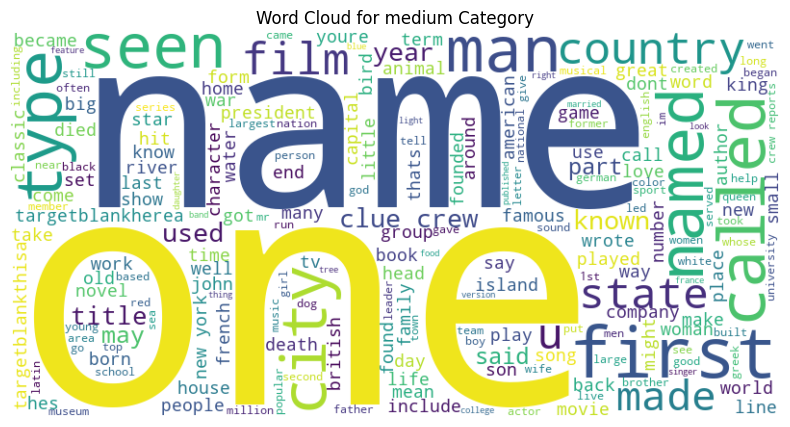

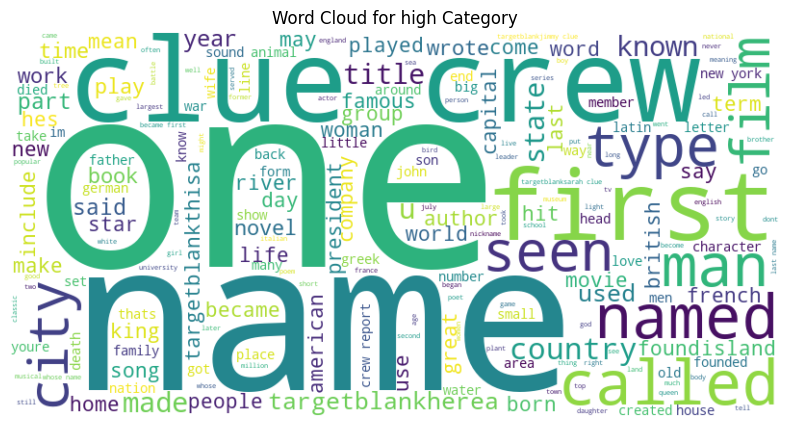

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(texts, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(texts))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

for category in df['value_category'].unique():
    category_texts = df[df['value_category'] == category]['cleaned_question']
    plot_wordcloud(category_texts, f"Word Cloud for {category} Category")

Оцінка якості моделі

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from sklearn.metrics import classification_report
import string
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB

df = pd.read_csv('wordset.csv')

df.columns = df.columns.str.strip()

def value_category(value):
    if isinstance(value, str):
        value = value.replace('$', '').replace(',', '')
        try:
            value = float(value)
        except ValueError:
            return 'low'
    if value <= 400:
        return 'low'
    elif value <= 800:
        return 'medium'
    else:
        return 'high'

df['value_category'] = df['Value'].apply(value_category)

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

df['cleaned_question'] = df['Question'].apply(preprocess_text)

X = df['cleaned_question']
y = df['value_category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

print("\nОцінка якості моделі:")
print(classification_report(y_test, y_pred))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\XXX\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Оцінка якості моделі:
              precision    recall  f1-score   support

        high       0.41      0.21      0.28     19507
         low       0.44      0.86      0.58     27064
      medium       0.30      0.03      0.05     18508

    accuracy                           0.43     65079
   macro avg       0.38      0.37      0.31     65079
weighted avg       0.39      0.43      0.34     65079

